In [1]:
import pandas as pd
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dict_labels = {'Basophil':0,'Eosinophil' : 1,'Lymphocyte':2,'Monocyte':3,'Neutrophil':4}
classes = list(dict_labels.keys())

In [3]:
# list_file_train=[os.listdir('Train\\'+label) for label in classes]
# list_file_test=[os.listdir('Test\\'+label) for label in classes]
# list_file_valid =[os.listdir('Valid\\Lymphocyte'),os.listdir('Valid\\Neutrophil')]

In [4]:
# with open('Train.txt','a') as f:
#     while(len(list_file_train[0]) > 0 or len(list_file_train[1]) > 0 or len(list_file_train[2]) > 0 or len(list_file_train[3]) > 0 or len(list_file_train[4]) > 0):
#         random_classes = classes[randint(0,4)]
#         while len(list_file_train[dict_labels[random_classes]]) == 0:
#             random_classes = classes[randint(0,4)]
#         f.write('Train/'+random_classes+'/'+list_file_train[dict_labels[random_classes]].pop() + ',' + str(dict_labels[random_classes]) +'\n')

# with open('Test.txt','a') as f:
#     while(len(list_file_test[0]) > 0 or len(list_file_test[1]) > 0 or len(list_file_test[2]) > 0 or len(list_file_test[3]) > 0 or len(list_file_test[4]) > 0):
#         random_classes = classes[randint(0,4)]
#         while len(list_file_test[dict_labels[random_classes]]) == 0:
#             random_classes = classes[randint(0,4)]
#         f.write('Test/'+random_classes+'/'+list_file_test[dict_labels[random_classes]].pop() + ',' + str(dict_labels[random_classes]) +'\n')

# with open('Valid.txt','a') as f:
#     while(len(list_file_valid[0]) > 0):
#         f.write('Valid/'+'Lymphocyte/'+list_file_valid[0].pop()+ ',' + '2' + '\n')
#     while(len(list_file_valid[1]) > 0):
#         f.write('Valid/'+'Neutrophil/'+list_file_valid[1].pop()+ ',' + '4' + '\n')


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.xception import preprocess_input

BATCH_SIZE = 32
IMAGE_SIZE = 299


data_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,         # Thêm xoay ảnh ngẫu nhiên trong khoảng ±20 độ
    width_shift_range=0.1,     # Tăng range shift lên 0.1
    height_shift_range=0.1,    # Tăng range shift lên 0.1
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,          # Thêm zoom ngẫu nhiên ±15%
    shear_range=0.2,         # Thêm biến dạng hình ảnh
    brightness_range=[0.8,1.2],# Thêm điều chỉnh độ sáng
    fill_mode='nearest',       # Xử lý pixels mới sau khi biến đổi
    validation_split=0.3,
    channel_shift_range=50.0
)

train_data = data_gen.flow_from_directory(directory='Train', subset='training', batch_size=BATCH_SIZE, shuffle=True, class_mode='categorical', target_size=(IMAGE_SIZE, IMAGE_SIZE))
valid_data = data_gen.flow_from_directory(directory='Train', subset='validation', batch_size=BATCH_SIZE, shuffle=False, class_mode='categorical', target_size=(IMAGE_SIZE, IMAGE_SIZE))
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(directory='Test', batch_size=BATCH_SIZE, shuffle=False, class_mode='categorical', target_size=(IMAGE_SIZE, IMAGE_SIZE))

Found 7124 images belonging to 5 classes.
Found 3051 images belonging to 5 classes.
Found 4339 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.49803925].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.654902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.5372549].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.5764706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.88235295..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.77254903..0.64705884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9529412..0.898

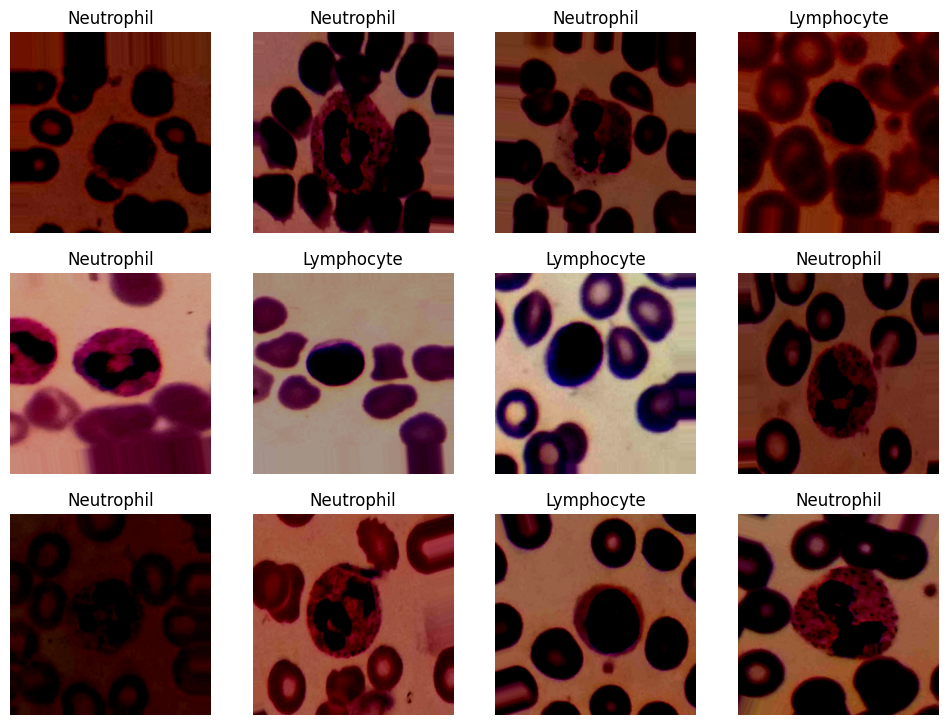

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte','Neutrophil']

image,label = next(train_data)

plt.figure(figsize = (12,12))
for i in range(12) :
    plt.subplot(4, 4, i+1)
    plt.imshow(image[i])
    plt.title(labels[np.argmax(label[i])])
    plt.axis('off')
plt.show()

In [15]:
from keras.applications.xception import Xception
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
import tensorflow as tf
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential,Model
from tensorflow.keras import regularizers
from keras.initializers import glorot_uniform

steps_per_epoch = np.ceil(len(train_data.filenames) / BATCH_SIZE).astype(int)
validation_steps = np.ceil(len(valid_data.filenames) / BATCH_SIZE).astype(int)

# EPOCHS = 50
# # initial_learning_rate = 2e-4
# # decay_steps = steps_per_epoch * EPOCHS

# # lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
# #     initial_learning_rate=initial_learning_rate,
# #     decay_steps=decay_steps,
# #     alpha=0.1
# # )

# net = Xception(include_top=False,weights=None,input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),classes=5)
# net.trainable = False
# x = net.output
# x = GlobalAveragePooling2D()(x)
# x = BatchNormalization()(x)
# x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
# x = Dropout(0.5)(x)

# x = Dense(5, activation='softmax',
#           kernel_initializer=glorot_uniform(),
#           kernel_regularizer=regularizers.l2(0.001))(x)

# model = Model(inputs=net.input,outputs=x)

# adam = tf.keras.optimizers.Adam(learning_rate=1e-4)

# model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# net.input

NameError: name 'net' is not defined

In [10]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Tính class weights
classes = train_data.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(classes),
    y=classes
)
class_weight_dict = dict(enumerate(class_weights))

In [120]:
class_weight_dict

{0: 9.56241610738255,
 1: 2.734740882917466,
 2: 0.8386109476162449,
 3: 3.6254452926208653,
 4: 0.32663915635029805}

In [11]:
import numpy as np

def custom_generator(data_gen, class_weight_dict):
    while True:
        X_batch, y_batch = next(data_gen)
        
        class_weights = np.array([class_weight_dict[np.argmax(label)] for label in y_batch])
        
        yield X_batch, y_batch, class_weights

train_data_after_adding_weights = custom_generator(train_data, class_weight_dict)
valid_data_after_adding_weights = custom_generator(valid_data,class_weight_dict)


In [122]:
train_data_after_adding_weights

<generator object custom_generator at 0x000001B433759210>

In [123]:
# from keras_inceptionV4 import inception_v4

# model = inception_v4.inception_v4(num_classes=5,dropout_keep_prob=0.5,weights='imagenet',include_top=False)

In [124]:
# model.summary()

In [12]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
ES = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=8, mode='min', restore_best_weights=True, verbose=1)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',min_lr=1e-7)


callbacks = [ES,RL]



In [16]:
net = Xception(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3))
net.trainable = False #Freezing Layers

x = net.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005))(x)
x = Dropout(0.5)(x)
x = Dense(5, activation='softmax',
          kernel_initializer=glorot_uniform(),
          kernel_regularizer=regularizers.l2(0.001))(x)

model = Model(inputs=net.input,outputs=x)

adam = tf.keras.optimizers.Adam(learning_rate=2e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(
    train_data_after_adding_weights,
    validation_data=valid_data_after_adding_weights,
    epochs=50,  # Số epochs cho giai đoạn 1
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1377s 6s/step - accuracy: 0.4103 - loss: 1.5877 - val_accuracy: 0.6758 - val_loss: 1.1100 - learning_rate: 2.0000e-04
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 793s 4s/step - accuracy: 0.7026 - loss: 0.9548 - val_accuracy: 0.7152 - val_loss: 0.9596 - learning_rate: 2.0000e-04
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 823s 4s/step - accuracy: 0.7680 - loss: 0.8087 - val_accuracy: 0.7139 - val_loss: 0.9271 - learning_rate: 2.0000e-04
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 818s 4s/step - accuracy: 0.7994 - loss: 0.7141 - val_accuracy: 0.7250 - val_loss: 0.8873 - learning_rate: 2.0000e-04
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 818s 4s/step - accuracy: 0.8094 - loss: 0.7019 - val_accuracy: 0.7801 - val_loss: 0.8761 - learning_rate: 2.0000e-04
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 815s 4s/step - accuracy: 0.8180 - loss: 0.6597 - val_accuracy: 0.7548 - val_loss: 0.8849 - learning_rate: 2.0000e-04
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 814s 4s/step - ac

In [17]:
net.trainable = True
#Finetuning
for layer in net.layers[:-20]:
    layer.trainable = False

adam = tf.keras.optimizers.Adam(learning_rate=1e-5)  
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

ES_finetune = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, 
                           mode='min', restore_best_weights=True, verbose=1)
RL_finetune = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, 
                               verbose=1, mode='min', min_lr=1e-7)
callbacks_finetune = [ES_finetune, RL_finetune]

history2 = model.fit(
    train_data_after_adding_weights,
    validation_data=valid_data_after_adding_weights,
    epochs=50,
    callbacks=callbacks_finetune,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1207s 5s/step - accuracy: 0.7614 - loss: 0.8760 - val_accuracy: 0.7640 - val_loss: 0.8974 - learning_rate: 1.0000e-05
Epoch 2/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1165s 5s/step - accuracy: 0.8322 - loss: 0.6216 - val_accuracy: 0.7719 - val_loss: 0.8146 - learning_rate: 1.0000e-05
Epoch 3/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1189s 5s/step - accuracy: 0.8557 - loss: 0.5545 - val_accuracy: 0.8037 - val_loss: 0.7952 - learning_rate: 1.0000e-05
Epoch 4/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1111s 5s/step - accuracy: 0.8685 - loss: 0.5017 - val_accuracy: 0.8394 - val_loss: 0.7457 - learning_rate: 1.0000e-05
Epoch 5/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1124s 5s/step - accuracy: 0.8922 - loss: 0.4847 - val_accuracy: 0.8381 - val_loss: 0.7077 - learning_rate: 1.0000e-05
Epoch 6/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 1107s 5s/step - accuracy: 0.8993 - loss: 0.4606 - val_accuracy: 0.8453 - val_loss: 0.6612 - learning_rate: 1.0000e-05
Epoch 7/50
223/223 ━━━━━━━━━━━━━━━━━━━━ 993s 4s/step

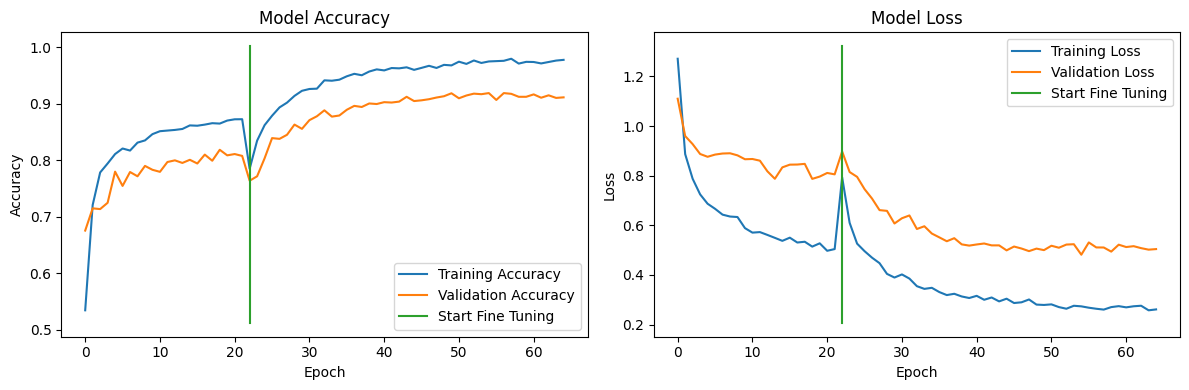

In [18]:
import matplotlib.pyplot as plt

def plot_training_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.plot([len(history1.history['accuracy']), len(history1.history['accuracy'])], 
             plt.ylim(), label='Start Fine Tuning')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.plot([len(history1.history['loss']), len(history1.history['loss'])], 
             plt.ylim(), label='Start Fine Tuning')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

plot_training_history(history1, history2)

In [19]:
# model.save('my_model.keras')

In [24]:
# from tensorflow.keras.models import load_model
# model = load_model('my_model.keras')

In [20]:
y_pred = model.predict(test_data)

c:\Users\AlarmTran\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step


In [22]:
y_pred = np.argmax(y_pred,axis=1)

In [29]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,confusion_matrix,classification_report


y_test = test_data.labels
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        89
           1       0.66      0.99      0.79       322
           2       0.94      0.99      0.97      1034
           3       0.97      0.81      0.88       234
           4       0.99      0.93      0.96      2660

    accuracy                           0.94      4339
   macro avg       0.90      0.94      0.92      4339
weighted avg       0.96      0.94      0.95      4339

